# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring01 = '201501'
getCitiBikeCSV(datestring01)

file in place, you can continue


In [4]:
datestring06 = '201506'
getCitiBikeCSV(datestring06)

file in place, you can continue


In [5]:
df_01 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring01 + '-citibike-tripdata.csv')
df_01.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [6]:
df_06 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring06 + '-citibike-tripdata.csv')
df_06.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [7]:
df = pd.concat([df_01,df_06])
df = df[::10]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
10,540,1/1/2015 0:10,1/1/2015 0:19,291,Madison St & Montgomery St,40.713126,-73.984844,151,Cleveland Pl & Spring St,40.721816,-73.997203,16947,Subscriber,1979.0,1
20,707,1/1/2015 0:18,1/1/2015 0:30,449,W 52 St & 9 Ave,40.764618,-73.987895,509,9 Ave & W 22 St,40.745497,-74.001971,14598,Subscriber,1972.0,1
30,321,1/1/2015 0:23,1/1/2015 0:29,285,Broadway & E 14 St,40.734546,-73.990741,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,15777,Subscriber,1986.0,1
40,302,1/1/2015 0:27,1/1/2015 0:32,509,9 Ave & W 22 St,40.745497,-74.001971,512,W 29 St & 9 Ave,40.750073,-73.998393,17621,Subscriber,1989.0,1


In [8]:
df['date'] = pd.to_datetime(df['starttime'])
df.head()



,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
10,540,1/1/2015 0:10,1/1/2015 0:19,291,Madison St & Montgomery St,40.713126,-73.984844,151,Cleveland Pl & Spring St,40.721816,-73.997203,16947,Subscriber,1979.0,1,2015-01-01 00:10:00
20,707,1/1/2015 0:18,1/1/2015 0:30,449,W 52 St & 9 Ave,40.764618,-73.987895,509,9 Ave & W 22 St,40.745497,-74.001971,14598,Subscriber,1972.0,1,2015-01-01 00:18:00
30,321,1/1/2015 0:23,1/1/2015 0:29,285,Broadway & E 14 St,40.734546,-73.990741,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,15777,Subscriber,1986.0,1,2015-01-01 00:23:00
40,302,1/1/2015 0:27,1/1/2015 0:32,509,9 Ave & W 22 St,40.745497,-74.001971,512,W 29 St & 9 Ave,40.750073,-73.998393,17621,Subscriber,1989.0,1,2015-01-01 00:27:00


In [9]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by time and looking at tripduration:

**H0: there is no statistical difference in the tripduration distribution of day and night riderships**
$$ \alpha = 0.05 $$

extracting the time happens in the cell below

In [10]:
#df is the dataframe where the content of the csv file is stored
df['ridetime'] = df['date'].dt.hour
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ridetime
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0
10,540,1/1/2015 0:10,1/1/2015 0:19,291,Madison St & Montgomery St,40.713126,-73.984844,151,Cleveland Pl & Spring St,40.721816,-73.997203,16947,Subscriber,1979.0,1,2015-01-01 00:10:00,0
20,707,1/1/2015 0:18,1/1/2015 0:30,449,W 52 St & 9 Ave,40.764618,-73.987895,509,9 Ave & W 22 St,40.745497,-74.001971,14598,Subscriber,1972.0,1,2015-01-01 00:18:00,0
30,321,1/1/2015 0:23,1/1/2015 0:29,285,Broadway & E 14 St,40.734546,-73.990741,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,15777,Subscriber,1986.0,1,2015-01-01 00:23:00,0
40,302,1/1/2015 0:27,1/1/2015 0:32,509,9 Ave & W 22 St,40.745497,-74.001971,512,W 29 St & 9 Ave,40.750073,-73.998393,17621,Subscriber,1989.0,1,2015-01-01 00:27:00,0


In [11]:
df_sub = df.drop(df[['start station id','stoptime','start station latitude','start station longitude','end station id','end station name','end station latitude','end station longitude','usertype','birth year','gender','bikeid']]
                 ,axis=1)
df_sub.head()

,tripduration,starttime,start station name,date,ridetime
0,1346,1/1/2015 0:01,1 Ave & E 44 St,2015-01-01 00:01:00,0
10,540,1/1/2015 0:10,Madison St & Montgomery St,2015-01-01 00:10:00,0
20,707,1/1/2015 0:18,W 52 St & 9 Ave,2015-01-01 00:18:00,0
30,321,1/1/2015 0:23,Broadway & E 14 St,2015-01-01 00:23:00,0
40,302,1/1/2015 0:27,9 Ave & W 22 St,2015-01-01 00:27:00,0


In [12]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df_sub['daytrip'] = df_sub['tripduration'][(df_sub['ridetime']>6) & (df_sub['ridetime']<18)]
df_sub['nighttrip'] = df_sub['tripduration'][(df_sub['ridetime']>=18) | (df_sub['ridetime']<=6)]
df_sub.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,ridetime,daytrip,nighttrip
count,122678.000000,122678.000000,81949.000000,40729.000000
mean,832.918665,13.906120,846.324141,805.946107
std,1542.162419,4.940328,1551.184517,1523.509142
min,60.000000,0.000000,60.000000,60.000000
25%,381.000000,10.000000,NaN,NaN
50%,607.000000,15.000000,NaN,NaN
75%,994.000000,18.000000,NaN,NaN
max,193133.000000,23.000000,193133.000000,132594.000000


In [13]:
# dropping NaN values
df_sub['daytrip'].dropna(inplace= True)
df_sub['nighttrip'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

Text(0.5,1,'night trips')

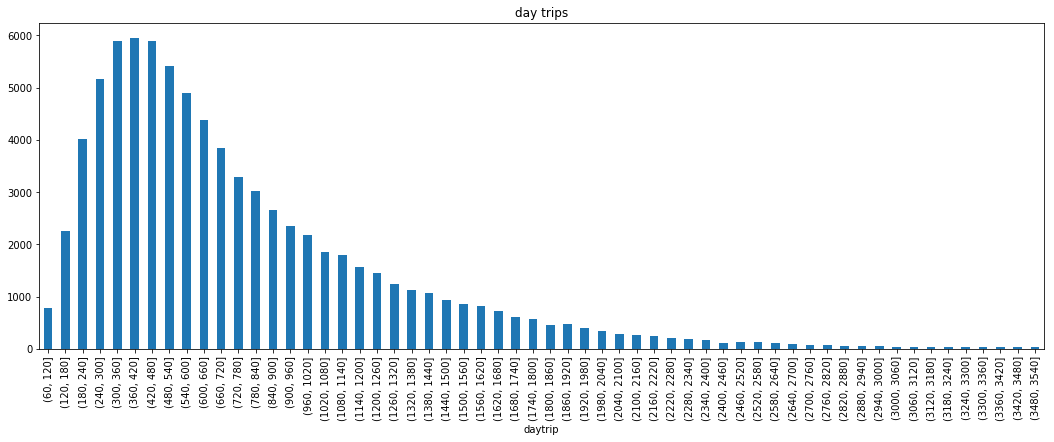

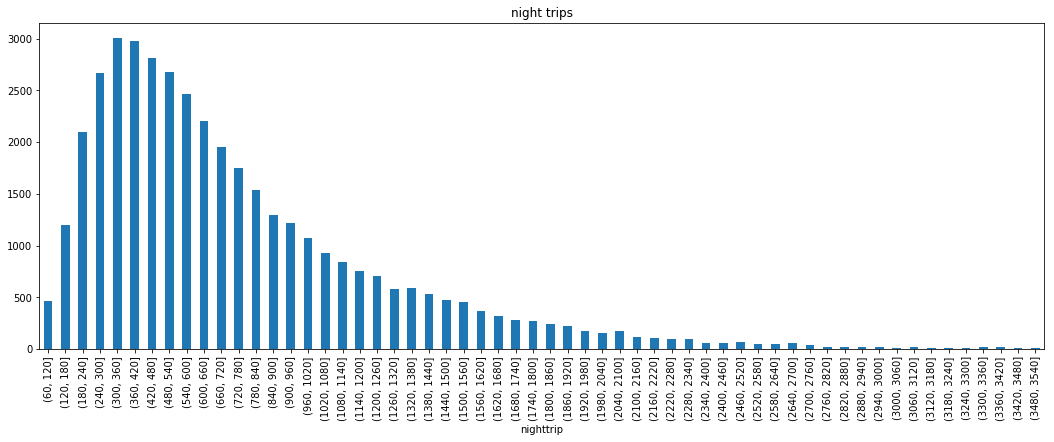

In [14]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 3600, 60)
axday = df_sub.daytrip.groupby(pd.cut(df_sub['daytrip'], bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False,figsize=(18, 6))
axday.set_title("day trips")

axnight = df_sub.nighttrip.groupby(pd.cut(df_sub['nighttrip'], bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False,figsize=(18, 6))
axnight.set_title("night trips")

**Figure 1: histogrammed distribution of riders' tripduration by time **

## Their distribution look similar and it is obvious tripduration is larger in day than in night, which is rational. However, in the fugure, we cannot decide there is significant differences between them.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
daytrip                    
(60, 120]          0.001759
(120, 180]         0.003503
(180, 240]         0.005701
(240, 300]         0.007733
(300, 360]         0.009065
(360, 420]         0.009285
(420, 480]         0.005884
(480, 540]         0.005198
(540, 600]         0.005499
(600, 660]         0.005858
(660, 720]         0.006547
(720, 780]         0.008952
(780, 840]         0.009686
(840, 900]         0.008651
(900, 960]         0.009690
(960, 1020]        0.009394
(1020, 1080]       0.009578
(1080, 1140]       0.008044
(1140, 1200]       0.007348
(1200, 1260]       0.006961
(1260, 1320]       0.006017
(1320, 1380]       0.006715
(1380, 1440]       0.006647
(1440, 1500]       0.006789
(1500, 1560]       0.007214
(1560, 1620]       0.006057
(1620, 1680]       0.004949
(1680, 1740]       0.004421
(1740, 1800]       0.004177
(1800, 1860]       0.004489
(1860, 1920]       0.004071
(1920, 1980]       0.003369
(1980, 2040]       0.002988
(2040, 2100]       0

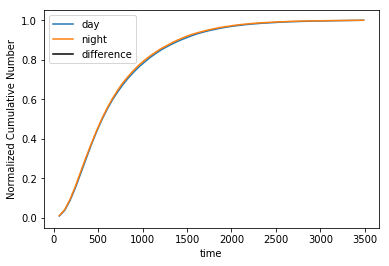

In [15]:
csd=df_sub.daytrip.groupby(pd.cut(df_sub.daytrip, bins)).agg([count_nonzero]).cumsum()

csn=df_sub.nighttrip.groupby(pd.cut(df_sub.nighttrip, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csd / csd.max()-csn / csn.max()))

pl.plot(bins[:-1] + 5, csd / csd.max(), label = "day")
pl.plot(bins[:-1] + 5, csn / csn.max(), label = "night")
pl.plot(bins[:-1] + 5, np.sqrt(csd / csd.max() - csn / csn.max())**2, 'k-',
        label = "difference")
pl.xlabel("time")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

## the two lines are nearly same. Their difference is very small.

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [16]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

### The null hypothesis is that 2 independent samples are drawn from the same continuous distribution.

In [17]:
ks = scipy.stats.ks_2samp(df_sub.daytrip[~np.isnan(df_sub.daytrip)], df_sub.nighttrip[~np.isnan(df_sub.nighttrip)])
print(ks)

Ks_2sampResult(statistic=0.014402520350999426, pvalue=2.4652997718966659e-05)


## The p-value at a significant level of 0.05 is near zero less than 0.05 , so I should reject the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

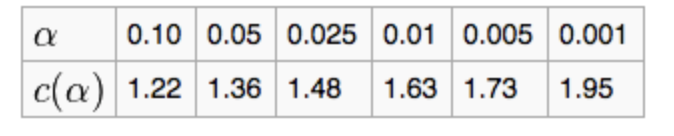

In [18]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename=('significant_level.png'))

In [19]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df_sub = df_sub[::200]
ks = scipy.stats.ks_2samp(df_sub.daytrip[~np.isnan(df_sub.daytrip)], df_sub.nighttrip[~np.isnan(df_sub.nighttrip)])
print(ks)

Ks_2sampResult(statistic=0.092395982783357256, pvalue=0.1853756511251243)


## The p-value at a significant level of 0.05 is 0.185 more than 0.05 , so I cannot reject the null hypothesis that 2 independent samples are drawn from the same continuous distribution. With the test of reduced dataset, p-value is becoming less significant.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [20]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
df_pearson01 = df_sub['daytrip']
df_pearson02 = df_sub['nighttrip']
df_01 = np.random.choice(df_pearson01,size=10000)
df_02 = np.random.choice(df_pearson02,size=10000)
pearsonstat = scipy.stats.pearsonr(np.sort(df_01), np.sort(df_02))
print(pearsonstat)

(nan, 1.0)


In [22]:
df_01

array([  967.,   774.,   854., ...,   509.,  2384.,  1048.])

In [23]:
df_02


array([ 324.,  603.,   nan, ...,  957.,   nan,  663.])

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [19]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**